### Import libraries

In [2]:
#!pip install tensorflow-hub

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential,layers

import warnings
warnings.filterwarnings('ignore')

### Collect Image Paths

In [5]:
aphids = glob.glob('Cotton plant disease/Cotton plant disease/Aphids edited/*.jpg')
army_worm = glob.glob('Cotton plant disease/Cotton plant disease/Army worm edited/*.jpg')
bacterial_blight = glob.glob('Cotton plant disease/Cotton plant disease/Bacterial Blight edited/*.jpg')
healthy_leaf = glob.glob('Cotton plant disease/Cotton plant disease/Healthy leaf edited/*.jpg')
powdery_mildew = glob.glob('Cotton plant disease/Cotton plant disease/Powdery Mildew edited/*.jpg')
target_spot = glob.glob('Cotton plant disease/Cotton plant disease/Target spot edited/*.jpg')

### Define Classes and Corresponding Labels

In [7]:
classes = {0: "aphids",1: "army_worm", 2: "bacterial_blight", 3: "healthy_leaf", 4: "powdery_mildew", 5: "target_spot"}

### Load and Label Images for Each Flower Category

In [9]:
images = []
labels = []

for i in aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in army_worm:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in bacterial_blight:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in healthy_leaf:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in powdery_mildew:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

for i in target_spot:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

### Plot first few images

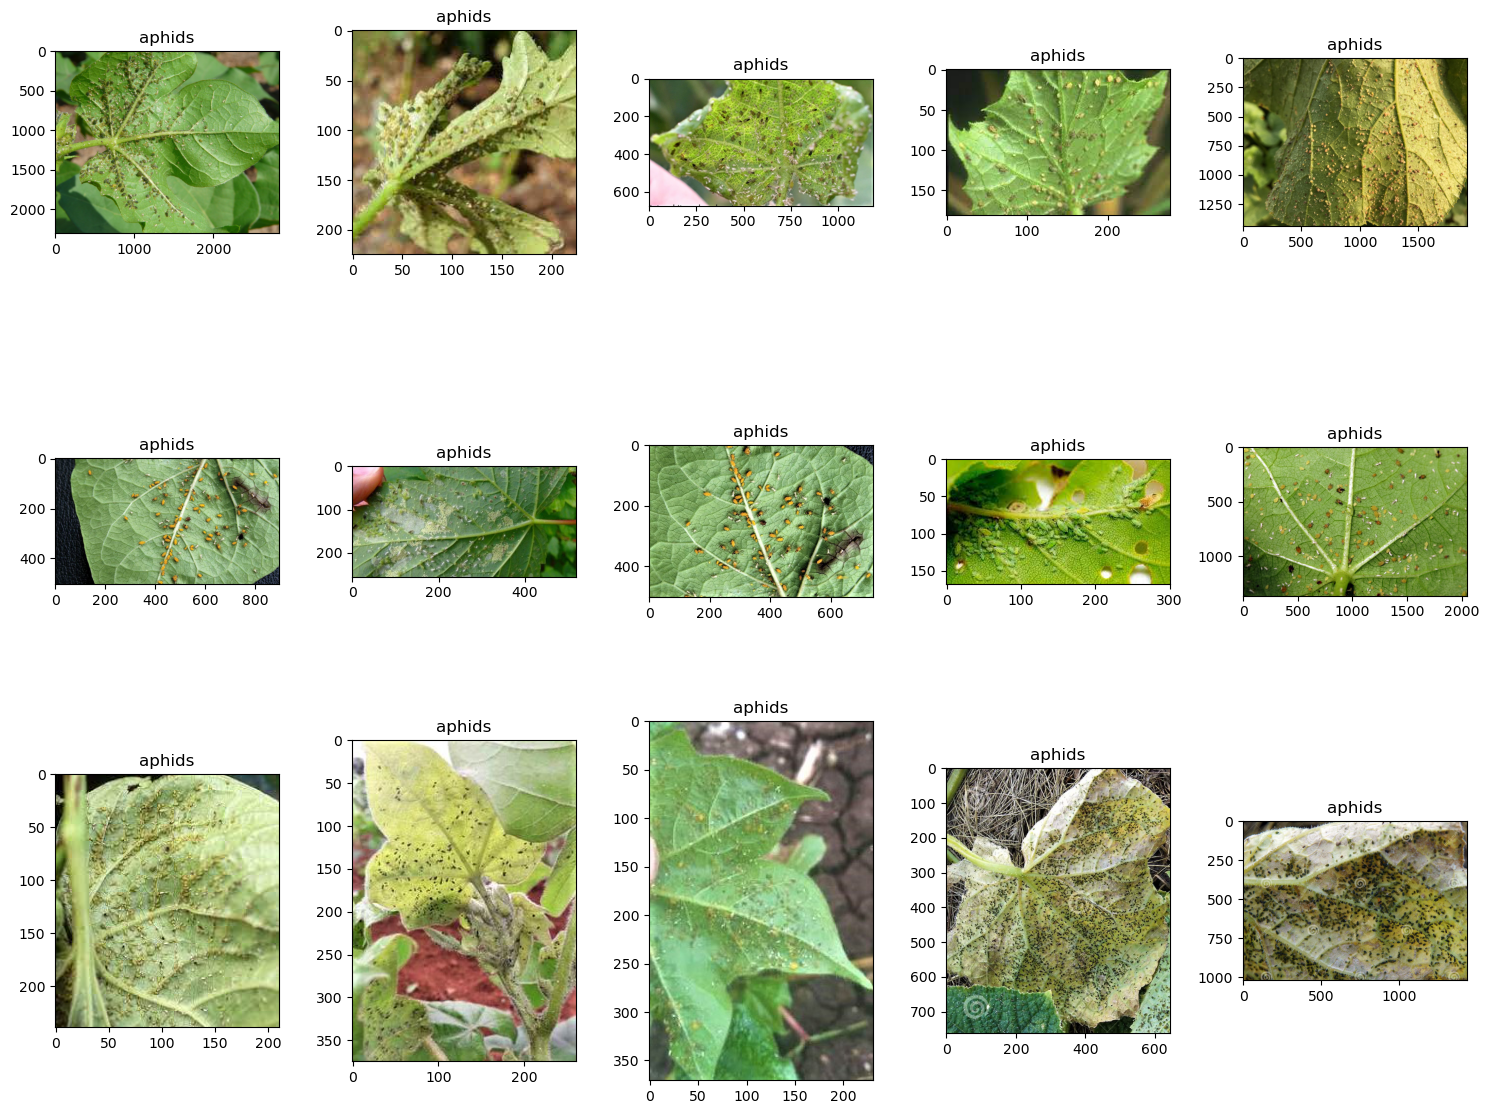

In [11]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i],cmap ='gray')
    plt.title(classes[labels[i]])

plt.tight_layout()

### Shuffle the images

In [13]:
images, labels = shuffle(images, labels)

In [14]:
labels[:5]

[4, 2, 0, 1, 0]

#### Plot them

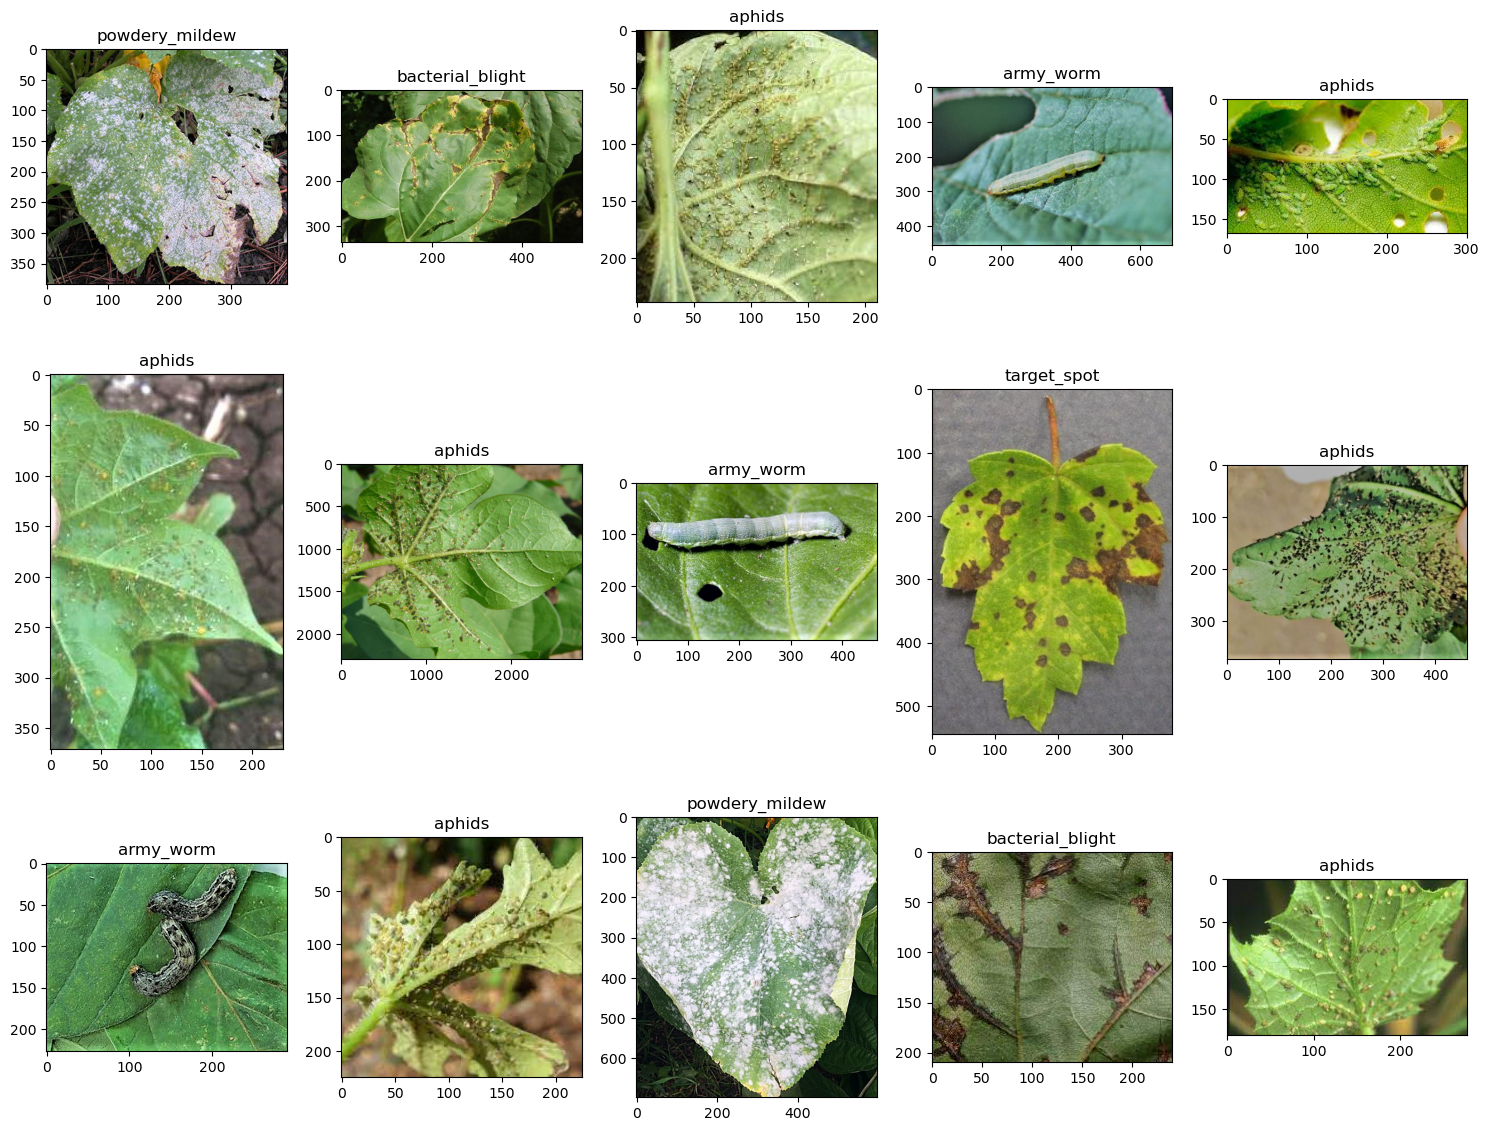

In [16]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i],cmap ='gray')
    plt.title(classes[labels[i]])

plt.tight_layout()

In [17]:
### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [18]:
X = []

for i in images:
    X.append(resize( i, (224,224,3)))

In [19]:
### Plot some of the images after resizing

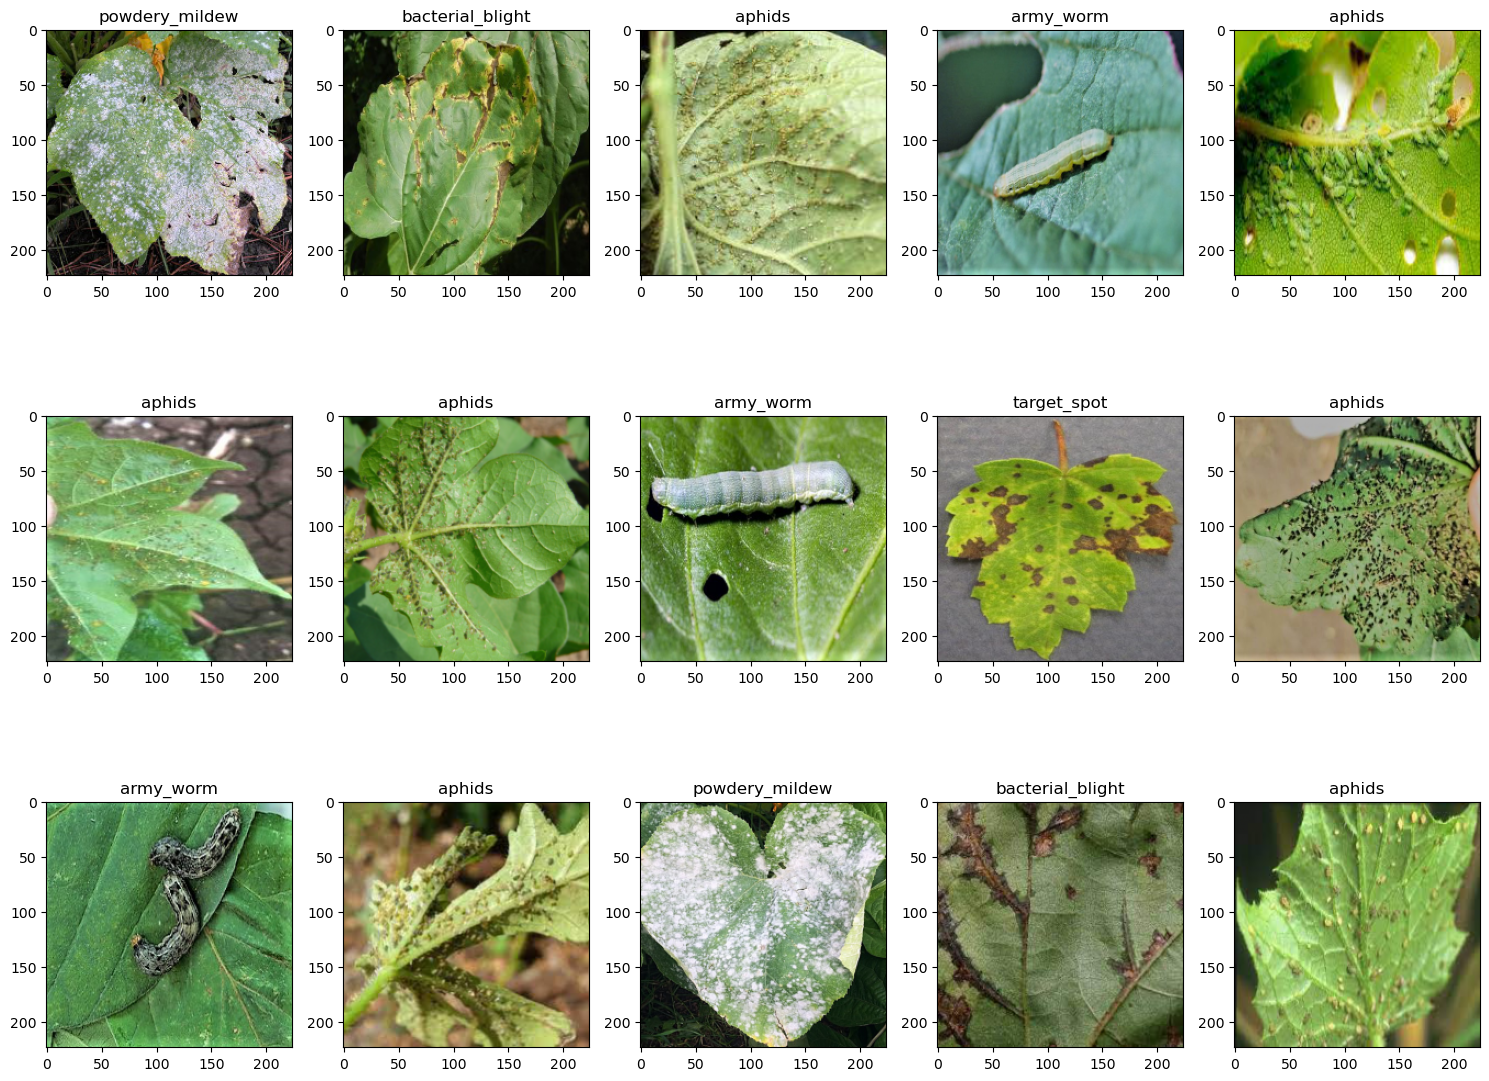

In [20]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X[i],cmap ='gray')
    plt.title(classes[labels[i]])

plt.tight_layout()

In [21]:
### Convert image and label to numpy arrays

In [22]:
X = np.array(X)
y = np.array(labels)

In [23]:
### Splitting into training and Testing data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

### MobileNetV2 Pre-trained Feature Extractor Model URL
* 
"https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [27]:
#### Load Pre-trained MobileNetV2 Feature Extractor Model

In [28]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x270f46e3860>

In [29]:
### Define Number of Output Classes

In [30]:
num_of_classes = 6

In [31]:
#### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [32]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [33]:
### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [39]:
model = Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Lambda(lambda x: pretrained_model_without_top_layer(x)),

    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax')
])

In [ ]:
### Compile Transfer Learning Model

In [41]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
### Train the model

In [45]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 965ms/step - accuracy: 0.2207 - loss: 1.7368 - val_accuracy: 0.3333 - val_loss: 1.7435
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 495ms/step - accuracy: 0.3755 - loss: 1.4601 - val_accuracy: 0.3333 - val_loss: 1.4991
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 518ms/step - accuracy: 0.6483 - loss: 1.1425 - val_accuracy: 0.4444 - val_loss: 1.3138
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 0.7107 - loss: 0.8816 - val_accuracy: 0.4444 - val_loss: 1.0550
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 490ms/step - accuracy: 0.7949 - loss: 0.6534 - val_accuracy: 0.6667 - val_loss: 0.8208
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.8608 - loss: 0.4592 - val_accuracy: 0.6667 - val_loss: 0.9012
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.8738 - loss: 0.4140 - val_accuracy: 0.5556 - val_loss: 0.9275
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - accuracy: 0.9224 - loss: 0.3293 - val_accuracy: 0.6667 - val_loss

In [46]:
### Model Prediction on Test Data

In [49]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step  


In [51]:
y_pred = [np.argmax(i) for i in y_pred]

In [ ]:
### Calculate Accuracy Score

In [53]:
accuracy_score(y_test,y_pred)

0.8450704225352113

In [55]:
### Plot confusion matrix on heatmap

<Axes: >

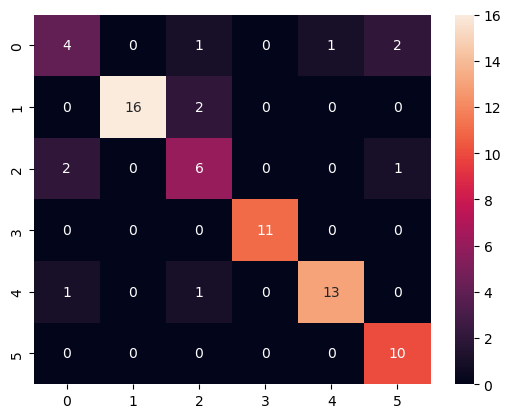

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [59]:
### Classification Report


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       1.00      0.89      0.94        18
           2       0.60      0.67      0.63         9
           3       1.00      1.00      1.00        11
           4       0.93      0.87      0.90        15
           5       0.77      1.00      0.87        10

    accuracy                           0.85        71
   macro avg       0.81      0.82      0.81        71
weighted avg       0.85      0.85      0.85        71



In [ ]:
#pip install --upgrade tensorflow tensorflow-hub


In [ ]:
#print("TensorFlow Version:", tf.__version__)
#print("TensorFlow Hub Version:", hub.__version__)